In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Exploratory data analysis

## Check for Null values

In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Obs No missing data

## Exploring numerical features

In [6]:
numerical_feature = df.select_dtypes(exclude=[object]).columns
numerical_feature

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [7]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<20]
discrete_feature

['Year', 'Owner']

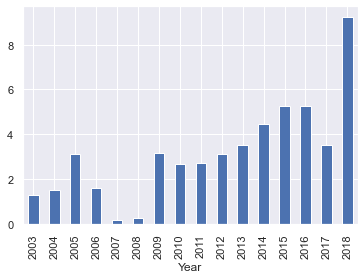

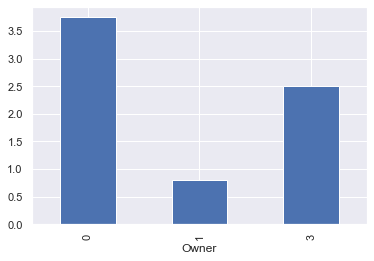

In [8]:
for feature in discrete_feature:
    df.groupby(feature)["Selling_Price"].median().plot.bar()
    plt.show()
        

obs-> usually with increase in owner, price should drop, but it is increasing
and year feature should be transformed.

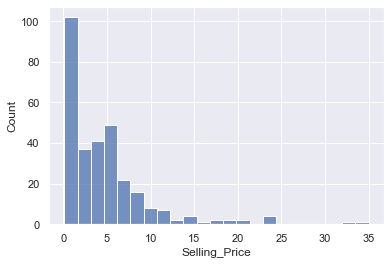

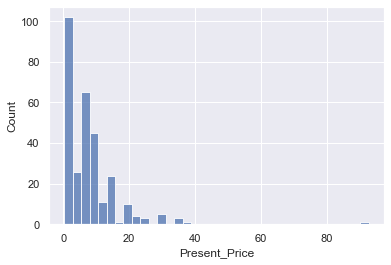

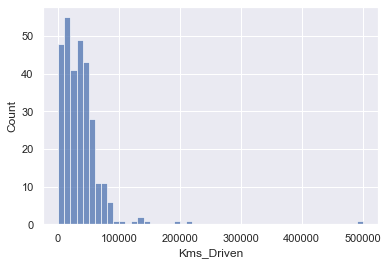

In [9]:
continious_feature =[feature for feature in numerical_feature if feature not in discrete_feature]
for feature in continious_feature:
    sns.histplot(data=df[feature])
    plt.show()
    

obj-> data is skewed. Not normally ditributed

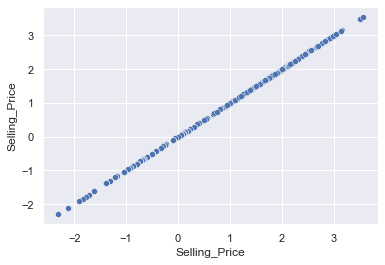

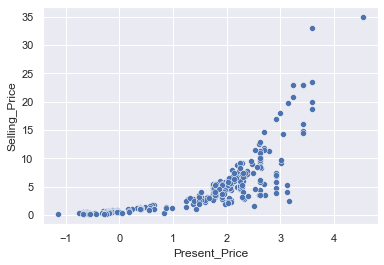

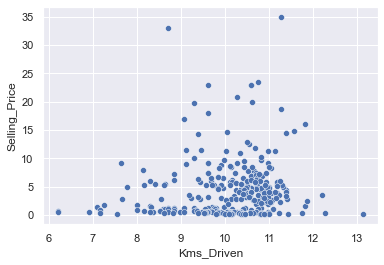

In [10]:
for feature in continious_feature:
    data = df.copy()
    if 0 not in data[feature].unique():
        data[feature]=np.log(data[feature])
        sns.scatterplot(x=data[feature], y=data['Selling_Price'])
        plt.show()

 feature present price has exponential relation with selling price.

### Categorical feature exploration

In [11]:
categorical_feature = df.select_dtypes(include=object).columns
print("Length is ", len(categorical_feature))
categorical_feature

Length is  4


Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [12]:
for feature in categorical_feature:
    print(feature, len(df[feature].unique()))

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


obs-> Car_name feature should be dropped, as it has various unique values. 

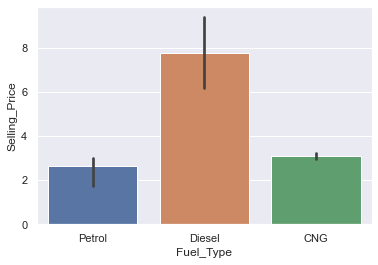

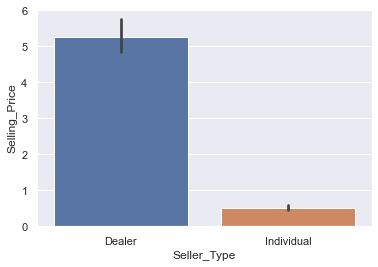

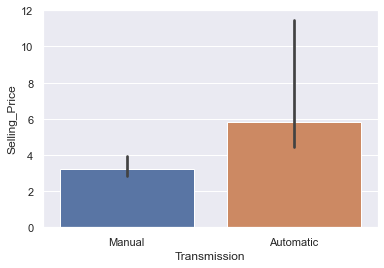

In [13]:
for feature in categorical_feature:
    data=df.copy()
    if feature!="Car_Name":
        sns.barplot(data=data, x=feature, y="Selling_Price", estimator=np.median)
        plt.show()

## Outlier detection

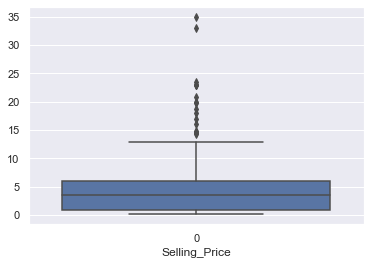

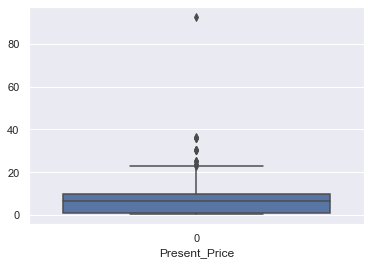

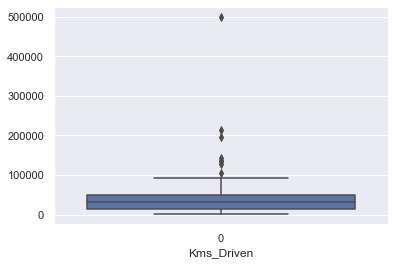

In [14]:
for feature in continious_feature:
    sns.boxplot(data=df[feature])
    plt.xlabel(feature)
    plt.show()

### Obsv-> outliers are present in dataset

## Feature Engineering

## Droping the car name column

In [15]:
df.drop(labels=["Car_Name"], axis=1, inplace=True)

In [16]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## transform year future

In [17]:
df['Year']=2020-df['Year']

In [18]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Encoding Categorical features

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


## Spliting the data set

In [20]:
X = df.copy()
X.drop(labels=["Selling_Price"], axis=1, inplace=True)
Y = df["Selling_Price"].copy()

In [21]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,5.59,27000,0,0,1,0,1
1,7,9.54,43000,0,1,0,0,1
2,3,9.85,6900,0,0,1,0,1
3,9,4.15,5200,0,0,1,0,1
4,6,6.87,42450,0,1,0,0,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [22]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(225, 8) (225,)
(76, 8) (76,)


## Preparing the model, random forest regressor.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [24]:
n_estimators = [100,120,150,170,200,250,300,400,450,550,600,700, 900]
max_features = ["auto", "sqrt"]
max_depth = [i for i in range(5,30,6)]
min_samples_split = [2, 5, 10, 15]
paras = {"n_estimators":n_estimators, "max_features":max_features, "max_depth":max_depth, "min_samples_split":min_samples_split}

In [25]:
reg = RandomizedSearchCV(RandomForestRegressor(), param_distributions=paras).fit(X_train, Y_train)

In [26]:
reg.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 23}

In [27]:
## Perforamance of model
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_train, reg.predict(X_train)))
print(mean_squared_error(Y_test, reg.predict(X_test)))

0.3999473913950127
0.7150873250349198


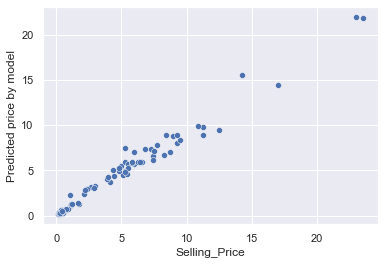

In [28]:
sns.scatterplot(x=Y_test, y=reg.predict(X_test))
plt.ylabel("Predicted price by model")
plt.show()

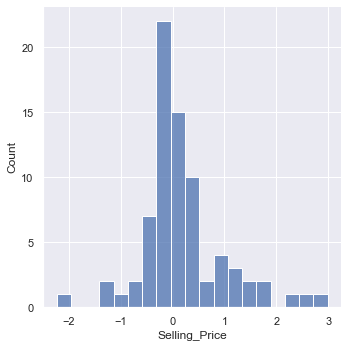

In [29]:
sns.displot(Y_test-reg.predict(X_test))

## Save the model

In [30]:
from joblib import dump
dump(reg, "model.pkl")

['model.pkl']